###### Práctica Reduccción de Dimensionalidad
* Métodos de Filtrado
* Métodos Wrapper
* Métodos Extracción:
    * LDA
    * PCA


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.feature_selection as FS

data = pd.read_csv("./wine_dataset.csv", delimiter=";")
data.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Se sustituye la columna Type por un valor categórico

In [36]:
data["Type"] = pd.Categorical.from_array(data["Type"]).codes
data["Type"].replace("A",0)
data["Type"].replace("B",1)
data["Type"].replace("C",2)
data.head()

/home/cristian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  """Entry point for launching an IPython kernel.


,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
data.describe()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Separamos la columna target del resto de variables predictoras

In [41]:

data_y = data["Type"]
data_X = data.drop("Type", 1)
data_X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Mutual Information

In [45]:
mi = FS.mutual_info_classif(data_X, data_y)
print(mi)
data_X.head(0)

[ 0.48574648  0.28561002  0.07018734  0.22437874  0.18131689  0.39646562
  0.67252086  0.12554434  0.28051452  0.54808278  0.45821259  0.50176726
  0.56123576]


,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline


In [46]:
names=data_X.axes[1]
names

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline'],
      dtype='object')

In [47]:
indice=np.argsort(mi)[::-1]
print(indice)
print(names[indice])

[ 6 12  9 11  0 10  5  1  8  3  4  7  2]
Index(['Flavanoids', 'Proline', 'Color_Intensity', 'OD280_OD315', 'Alcohol',
       'Hue', 'Total_Phenols', 'Malic_Acid', 'Proanthocyanins',
       'Ash_Alcalinity', 'Magnesium', 'Nonflavanoid_Phenols', 'Ash'],
      dtype='object')


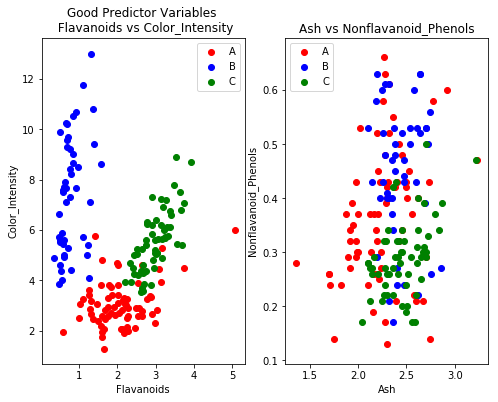

In [48]:
plt.figure(figsize=(8,6))
plt.subplot(121)

plt.scatter(data[data.Type==1].Flavanoids,data[data.Type==1].Color_Intensity, color='red')
plt.scatter(data[data.Type==2].Flavanoids,data[data.Type==2].Color_Intensity, color='blue')
plt.scatter(data[data.Type==0].Flavanoids,data[data.Type==0].Color_Intensity, color='green')
plt.title('Good Predictor Variables \n Flavanoids vs Color_Intensity')
plt.xlabel('Flavanoids')
plt.ylabel('Color_Intensity')
plt.legend(['A','B','C'])

plt.subplot(122)

plt.scatter(data[data.Type==1].Ash,data[data.Type==1].Nonflavanoid_Phenols, color='red')
plt.scatter(data[data.Type==2].Ash,data[data.Type==2].Nonflavanoid_Phenols, color='blue')
plt.scatter(data[data.Type==0].Ash,data[data.Type==0].Nonflavanoid_Phenols, color='green')
plt.title('Ash vs Nonflavanoid_Phenols')
plt.xlabel('Ash')
plt.ylabel('Nonflavanoid_Phenols')
plt.legend(['A','B','C'])
plt.show()

###### Chi-Square

Ahora aplicamos Chi-Square para seleccionar las variables informativas


In [49]:


chi = FS.chi2(X = data_X, y = data["Type"])[0]
print(chi)
indice_chi=np.argsort(chi)[::-1]
print(indice_chi)
print(names[indice_chi])



[  5.44549882e+00   2.80686046e+01   7.43380598e-01   2.93836955e+01
   4.50263809e+01   1.56230759e+01   6.33343081e+01   1.81548480e+00
   9.36828307e+00   1.09016647e+02   5.18253981e+00   2.33898834e+01
   1.65400671e+04]
[12  9  6  4  3  1 11  5  8  0 10  7  2]
Index(['Proline', 'Color_Intensity', 'Flavanoids', 'Magnesium',
       'Ash_Alcalinity', 'Malic_Acid', 'OD280_OD315', 'Total_Phenols',
       'Proanthocyanins', 'Alcohol', 'Hue', 'Nonflavanoid_Phenols', 'Ash'],
      dtype='object')


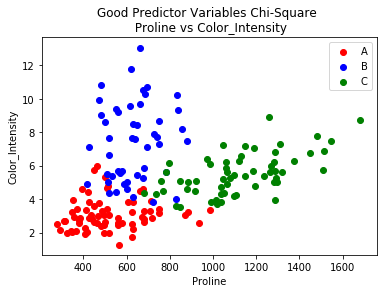

In [50]:
plt.figure()

plt.scatter(data[data.Type==1].Proline,data[data.Type==1].Color_Intensity, color='red')
plt.scatter(data[data.Type==2].Proline,data[data.Type==2].Color_Intensity, color='blue')
plt.scatter(data[data.Type==0].Proline,data[data.Type==0].Color_Intensity, color='green')
plt.title('Good Predictor Variables Chi-Square \n Proline vs Color_Intensity')
plt.xlabel('Proline')
plt.ylabel('Color_Intensity')
plt.legend(['A','B','C'])
plt.show()

### Principal Component Analysis (PCA)

In [51]:
from sklearn.decomposition.pca import PCA

##### PCA without normalization

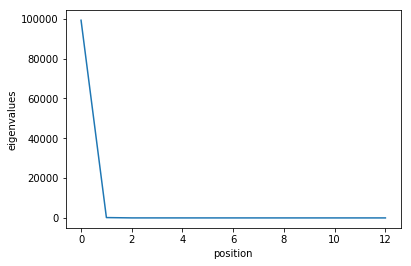

Eigenvalues
 [  9.92017895e+04   1.72535266e+02   9.43811370e+00   4.99117861e+00
   1.22884523e+00   8.41063869e-01   2.78973523e-01   1.51381266e-01
   1.12096765e-01   7.17026032e-02   3.75759789e-02   2.10723661e-02
   8.20370314e-03]

Explained variance ratio (first two components):
 [  9.98091230e-01   1.73591562e-03   9.49589576e-05   5.02173562e-05
   1.23636847e-05   8.46213034e-06   2.80681456e-06   1.52308053e-06
   1.12783044e-06   7.21415811e-07   3.78060267e-07   2.12013755e-07
   8.25392788e-08]


In [52]:
pca = PCA()
pca.fit(data_X)
plt.plot(pca.explained_variance_)
plt.ylabel("eigenvalues")
plt.xlabel("position")
plt.show()
print ("Eigenvalues\n",pca.explained_variance_)
# Percentage of variance explained for each components
print('\nExplained variance ratio (first two components):\n %s'
      % str(pca.explained_variance_ratio_))



Dibujamos la proyección en las dos primeras componentes principales

              0          1
0    318.562979  21.492131
1    303.097420  -5.364718
2    438.061133  -6.537309
3    733.240139   0.192729
4    -11.571428  18.489995
5    703.231192  -0.332159
6    542.971581 -13.518967
7    548.401860  11.449432
8    298.036863  -8.180158
9    298.049553  -7.101543
10   763.079712  -8.334317
11   532.943228 -14.287634
12   572.834410 -21.005014
13   402.925358 -16.102635
14   800.053394 -12.118447
15   563.245578   2.214829
16   533.379651  10.804802
17   383.317591   8.477420
18   933.118387  -8.354478
19    98.403177  14.392659
20    33.593594  25.567956
21    23.146438   1.817473
22   288.093030  -3.963042
23   267.981513  -9.570704
24    98.019886  -5.495846
25    83.498744  22.891622
26   447.925596 -14.797331
27   537.919165 -15.388346
28   168.210468   4.255311
29   288.008247  -8.959732
..          ...        ...
148  -97.019389  -5.906443
149 -196.624807  16.873114
150 -246.449199  27.810095
151 -266.628788  17.150232
152 -321.570741  22.164340
1

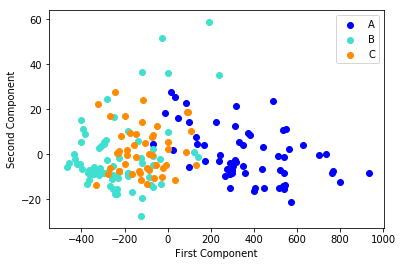

In [58]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(data_X))

pca_A = X_pca[data_y == 0]
pca_B = X_pca[data_y == 1]
pca_C = X_pca[data_y == 2]

#plot
plt.scatter(x = pca_A[0], y = pca_A[1], c="blue")
plt.scatter(x = pca_B[0], y = pca_B[1], c="turquoise")
plt.scatter(x = pca_C[0], y = pca_C[1], c="darkorange")
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.legend(["A","B","C"])
plt.show()

#### PCA with Normalization

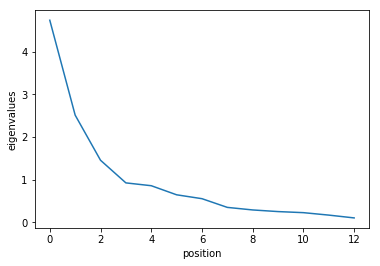

Eigenvalues
 [ 4.73243698  2.51108093  1.45424187  0.92416587  0.85804868  0.64528221
  0.55414147  0.35046627  0.29051203  0.25232001  0.22706428  0.16972374
  0.10396199]

Explained variance ratio (first two components):
 [ 0.36198848  0.1920749   0.11123631  0.0706903   0.06563294  0.04935823
  0.04238679  0.02680749  0.02222153  0.01930019  0.01736836  0.01298233
  0.00795215]


In [16]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(data_X)

pca = PCA()
pca.fit(X_scaled)
plt.plot(pca.explained_variance_)
plt.ylabel("eigenvalues")
plt.xlabel("position")
plt.show()
print ("Eigenvalues\n",pca.explained_variance_)

# Percentage of variance explained for each components
print('\nExplained variance ratio (first two components):\n %s'
      % str(pca.explained_variance_ratio_))




            0         1
0    3.316751 -1.443463
1    2.209465  0.333393
2    2.516740 -1.031151
3    3.757066 -2.756372
4    1.008908 -0.869831
5    3.050254 -2.122401
6    2.449090 -1.174850
7    2.059437 -1.608963
8    2.510874 -0.918071
9    2.753628 -0.789438
10   3.479737 -1.302333
11   1.754753 -0.611977
12   2.113462 -0.675706
13   3.458157 -1.130630
14   4.312784 -2.095976
15   2.305188 -1.662552
16   2.171955 -2.327305
17   1.898971 -1.631369
18   3.541985 -2.518344
19   2.084522 -1.061138
20   3.124403 -0.786897
21   1.086570 -0.241744
22   2.535224  0.091841
23   1.644988  0.516279
24   1.761576  0.317149
25   0.990079 -0.940667
26   1.775278 -0.686175
27   1.235424  0.089807
28   2.188406 -0.689570
29   2.256109 -0.191462
..        ...       ...
148 -2.807064 -1.570534
149 -2.899659 -2.041057
150 -2.320737 -2.356366
151 -2.549831 -2.045283
152 -1.812541 -1.527646
153 -2.760145 -2.138932
154 -2.737151 -0.409886
155 -3.604869 -1.802384
156 -2.889826 -1.925219
157 -3.392156 -1

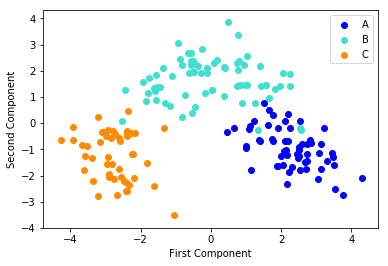

In [26]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

pca_A = X_pca[data_y == 'A']
pca_B = X_pca[data_y == 'B']
pca_C = X_pca[data_y == 'C']


#plot
plt.scatter(x = pca_A[0], y = pca_A[1], c="blue")
plt.scatter(x = pca_B[0], y = pca_B[1], c="turquoise")
plt.scatter(x = pca_C[0], y = pca_C[1], c="darkorange")
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.legend(["A","B","C"])
plt.show()

### Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class.

The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

##### LDA without normalization

In [66]:
lda = LDA()
lda.fit(data_X,data_y)
print("Porcentaje explicado:", lda.explained_variance_ratio_)


Porcentaje explicado: [ 0.68747889  0.31252111]


            0         1
0   -4.700244  1.979138
1   -4.301958  1.170413
2   -3.420720  1.429101
3   -4.205754  4.002871
4   -1.509982  0.451224
5   -4.518689  3.213138
6   -4.527378  3.269122
7   -4.148348  3.104118
8   -3.860829  1.953383
9   -3.366624  1.678643
10  -4.805879  2.235363
11  -3.428076  2.175109
12  -3.666102  2.262490
13  -5.588246  2.054788
14  -5.501314  3.613049
15  -3.184752  2.889525
16  -3.289370  2.765843
17  -2.998093  1.425111
18  -5.246404  3.709827
19  -3.136531  1.976899
20  -3.577478  0.562460
21  -1.690771  0.913421
22  -4.835150  0.914763
23  -3.095890  0.617359
24  -3.321647  0.298477
25  -2.144822  0.163692
26  -3.982428  2.175157
27  -2.685914  1.218509
28  -3.563095  1.038177
29  -3.173016  1.377896
..        ...       ...
148  4.983592  2.034955
149  4.869683  1.808329
150  4.598692  1.872242
151  5.674479  1.825803
152  5.329861  0.582185
153  5.034010  2.277321
154  4.520801 -0.006734
155  5.097837  2.001620
156  5.043683  2.511903
157  4.869808  1

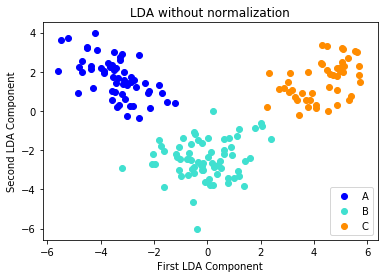

In [64]:

X_lda = pd.DataFrame(lda.fit_transform(data_X, data_y))

# Dividimos en los 3 tipos para ponerles diferentes colores
lda_A = X_lda[data_y == 0]
lda_B = X_lda[data_y == 1]
lda_C = X_lda[data_y == 2]

#plot
plt.scatter(x = lda_A[0], y = lda_A[1], c="blue")
plt.scatter(x = lda_B[0], y = lda_B[1], c="turquoise")
plt.scatter(x = lda_C[0], y = lda_C[1], c="darkorange")
plt.title("LDA without normalization")
plt.xlabel("First LDA Component")
plt.ylabel("Second LDA Component")
plt.legend((["A","B","C"]), loc="lower right")
plt.show()


#### LDA with normalization

In [ ]:
lda = LDA(n_components=2)
lda.fit(X_scaled,data_y)
print("Porcentaje explicado:", lda.explained_variance_ratio_)

In [ ]:

X_lda = pd.DataFrame(lda.fit_transform(data_X, data_y))

# Dividimos en los 3 tipos para ponerles diferentes colores
lda_A = X_lda[data_y == 0]
lda_B = X_lda[data_y == 1]
lda_C = X_lda[data_y == 2]

#plot
plt.scatter(x = lda_A[0], y = lda_A[1], c="blue")
plt.scatter(x = lda_B[0], y = lda_B[1], c="turquoise")
plt.scatter(x = lda_C[0], y = lda_C[1], c="darkorange")
plt.xlabel("First LDA Component")
plt.ylabel("Second LDA Component")
plt.legend(["A","B","C"],loc="lower right")
plt.title("LDA with normalization")
plt.show()


With this we have verified that LDA is invariant to scale

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.